In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow import keras

In [42]:
layers = keras.layers
models = keras.models
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 2.14.0


In [43]:
df = pd.read_excel(r'D:\GST BO Data\GST BO MIS Registration Tax Payer Register\DealerMapped.xlsx')

print(df.head())

         GSTIN No.        Trade/Legal Name  \
0  22AABFC8636K1ZG     CHANDRA ENTERPRISES   
1  22ADPPT9733P1ZK       M/S TIWARI MOTORS   
2  22AJRPP8249A2Z2            SHASTRI AUTO   
3  22ADMPY8342G1Z6  M/S SHYAM LUXMI MOTORS   
4  22APWPG5074M1ZD      Vishal Automobiles   

                                            HSN      Sector  Sector_code  
0  40121910,87082900,87141090,87142010,87142090  Automobile            1  
1  27011100,87081090,87021011,00440181,00440262  Automobile            1  
2                                     8711,9801  Automobile            1  
3                       8714,8443,8708,00440245  Automobile            1  
4  27101980,34031900,87149990,85072000,87089900  Automobile            1  


In [4]:
print(df['Sector'].value_counts())

Sector
Works Contract                                                                      3153
Iron & Steel                                                                        1058
Food Items                                                                          1027
Cement & Products                                                                    975
Pharmaceuticals & Medicine                                                           633
Petroleum Products                                                                   601
Machinery                                                                            593
Bullion & Jewellery                                                                  580
Readymade Garments                                                                   564
Electricals                                                                          559
Transport & Logistics                                                                533
Fertilizers & 

In [44]:
clean_sector = ['Works Contract','Iron & Steel']
mask = df['Sector'].isin(clean_sector)
df = df[~mask]
print(df['Sector'].value_counts())

Sector
Food Items                                                                          1027
Cement & Products                                                                    975
Pharmaceuticals & Medicine                                                           633
Petroleum Products                                                                   601
Machinery                                                                            593
Bullion & Jewellery                                                                  580
Readymade Garments                                                                   564
Electricals                                                                          559
Transport & Logistics                                                                533
Fertilizers & Chemicals                                                              485
FMCG (Fast Moving Consumer Goods)                                                    429
Manpower      

In [45]:
X = df['HSN']
y = df['Sector']
train_text, test_text, train_cat, test_cat = train_test_split(X, y.ravel(), test_size=0.2)

In [46]:
print('x_train shape:', train_text.shape)
print('x_test shape:', test_text.shape)
print('y_train shape:', train_cat.shape)
print('y_test shape:', test_cat.shape)

x_train shape: (10384,)
x_test shape: (2597,)
y_train shape: (10384,)
y_test shape: (2597,)


In [47]:
max_code = 20
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_code, 
                                              char_level=False)

In [48]:
tokenize.fit_on_texts(train_text) # fit tokenizer to our training text data
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [49]:
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

In [50]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [51]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (10384, 20)
x_test shape: (2597, 20)
y_train shape: (10384, 57)
y_test shape: (2597, 57)


In [52]:
# This model trains very quickly and 2 epochs are already more than enough
# Training for more epochs will likely lead to overfitting on this dataset
# You can try tweaking these hyperparamaters when using this model with your own data
batch_size = 32
epochs = 2
drop_ratio = 0.5

In [53]:
# Build the model
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(max_code,)))
model.add(layers.Activation('relu'))
# model.add(layers.Dropout(drop_ratio))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [54]:
# model.fit trains the model
# The validation_split param tells Keras what % of our training data should be used in the validation set
# You can see the validation loss decreasing slowly when you run this
# Because val_loss is no longer decreasing we stop training to prevent overfitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/2
293/293 [==============================] - 1s 2ms/step - loss: 3.3478 - accuracy: 0.1856 - val_loss: 3.1187 - val_accuracy: 0.1896
Epoch 2/2
293/293 [==============================] - 0s 1ms/step - loss: 3.1252 - accuracy: 0.1993 - val_loss: 3.0977 - val_accuracy: 0.2108


In [55]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

82/82 [==============================] - 0s 1ms/step - loss: 3.1254 - accuracy: 0.1956
Test loss: 3.1254284381866455
Test accuracy: 0.19561031460762024


In [56]:
# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_text.iloc[i][:50], "...")
    print('Actual label:' + test_cat[i])
    print("Predicted label: " + predicted_label + "\n")  

1/1 [==============================] - 0s 56ms/step
48201010 ...
Actual label:Paper, News Prints & Stationary
Predicted label: Bullion & Jewellery

1/1 [==============================] - 0s 16ms/step
74130000,70111010,85251020,85441190,85361020 ...
Actual label:Electricals
Predicted label: Bullion & Jewellery

1/1 [==============================] - 0s 18ms/step
998713,998739,998112 ...
Actual label:IT & Computers - Software
Predicted label: Bullion & Jewellery

1/1 [==============================] - 0s 18ms/step
8418 ...
Actual label:Electronics
Predicted label: Bullion & Jewellery

1/1 [==============================] - 0s 24ms/step
85361010,85441110,86040000,85094090,00440060,00440 ...
Actual label:Electricals
Predicted label: Manpower

1/1 [==============================] - 0s 28ms/step
68101110 ...
Actual label:Cement & Products
Predicted label: Bullion & Jewellery

1/1 [==============================] - 0s 16ms/step
27101211,27101212,27101213,27101930 ...
Actual label:Petroleum Pr

In [38]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

78/78 [==============================] - 0s 1ms/step


In [23]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

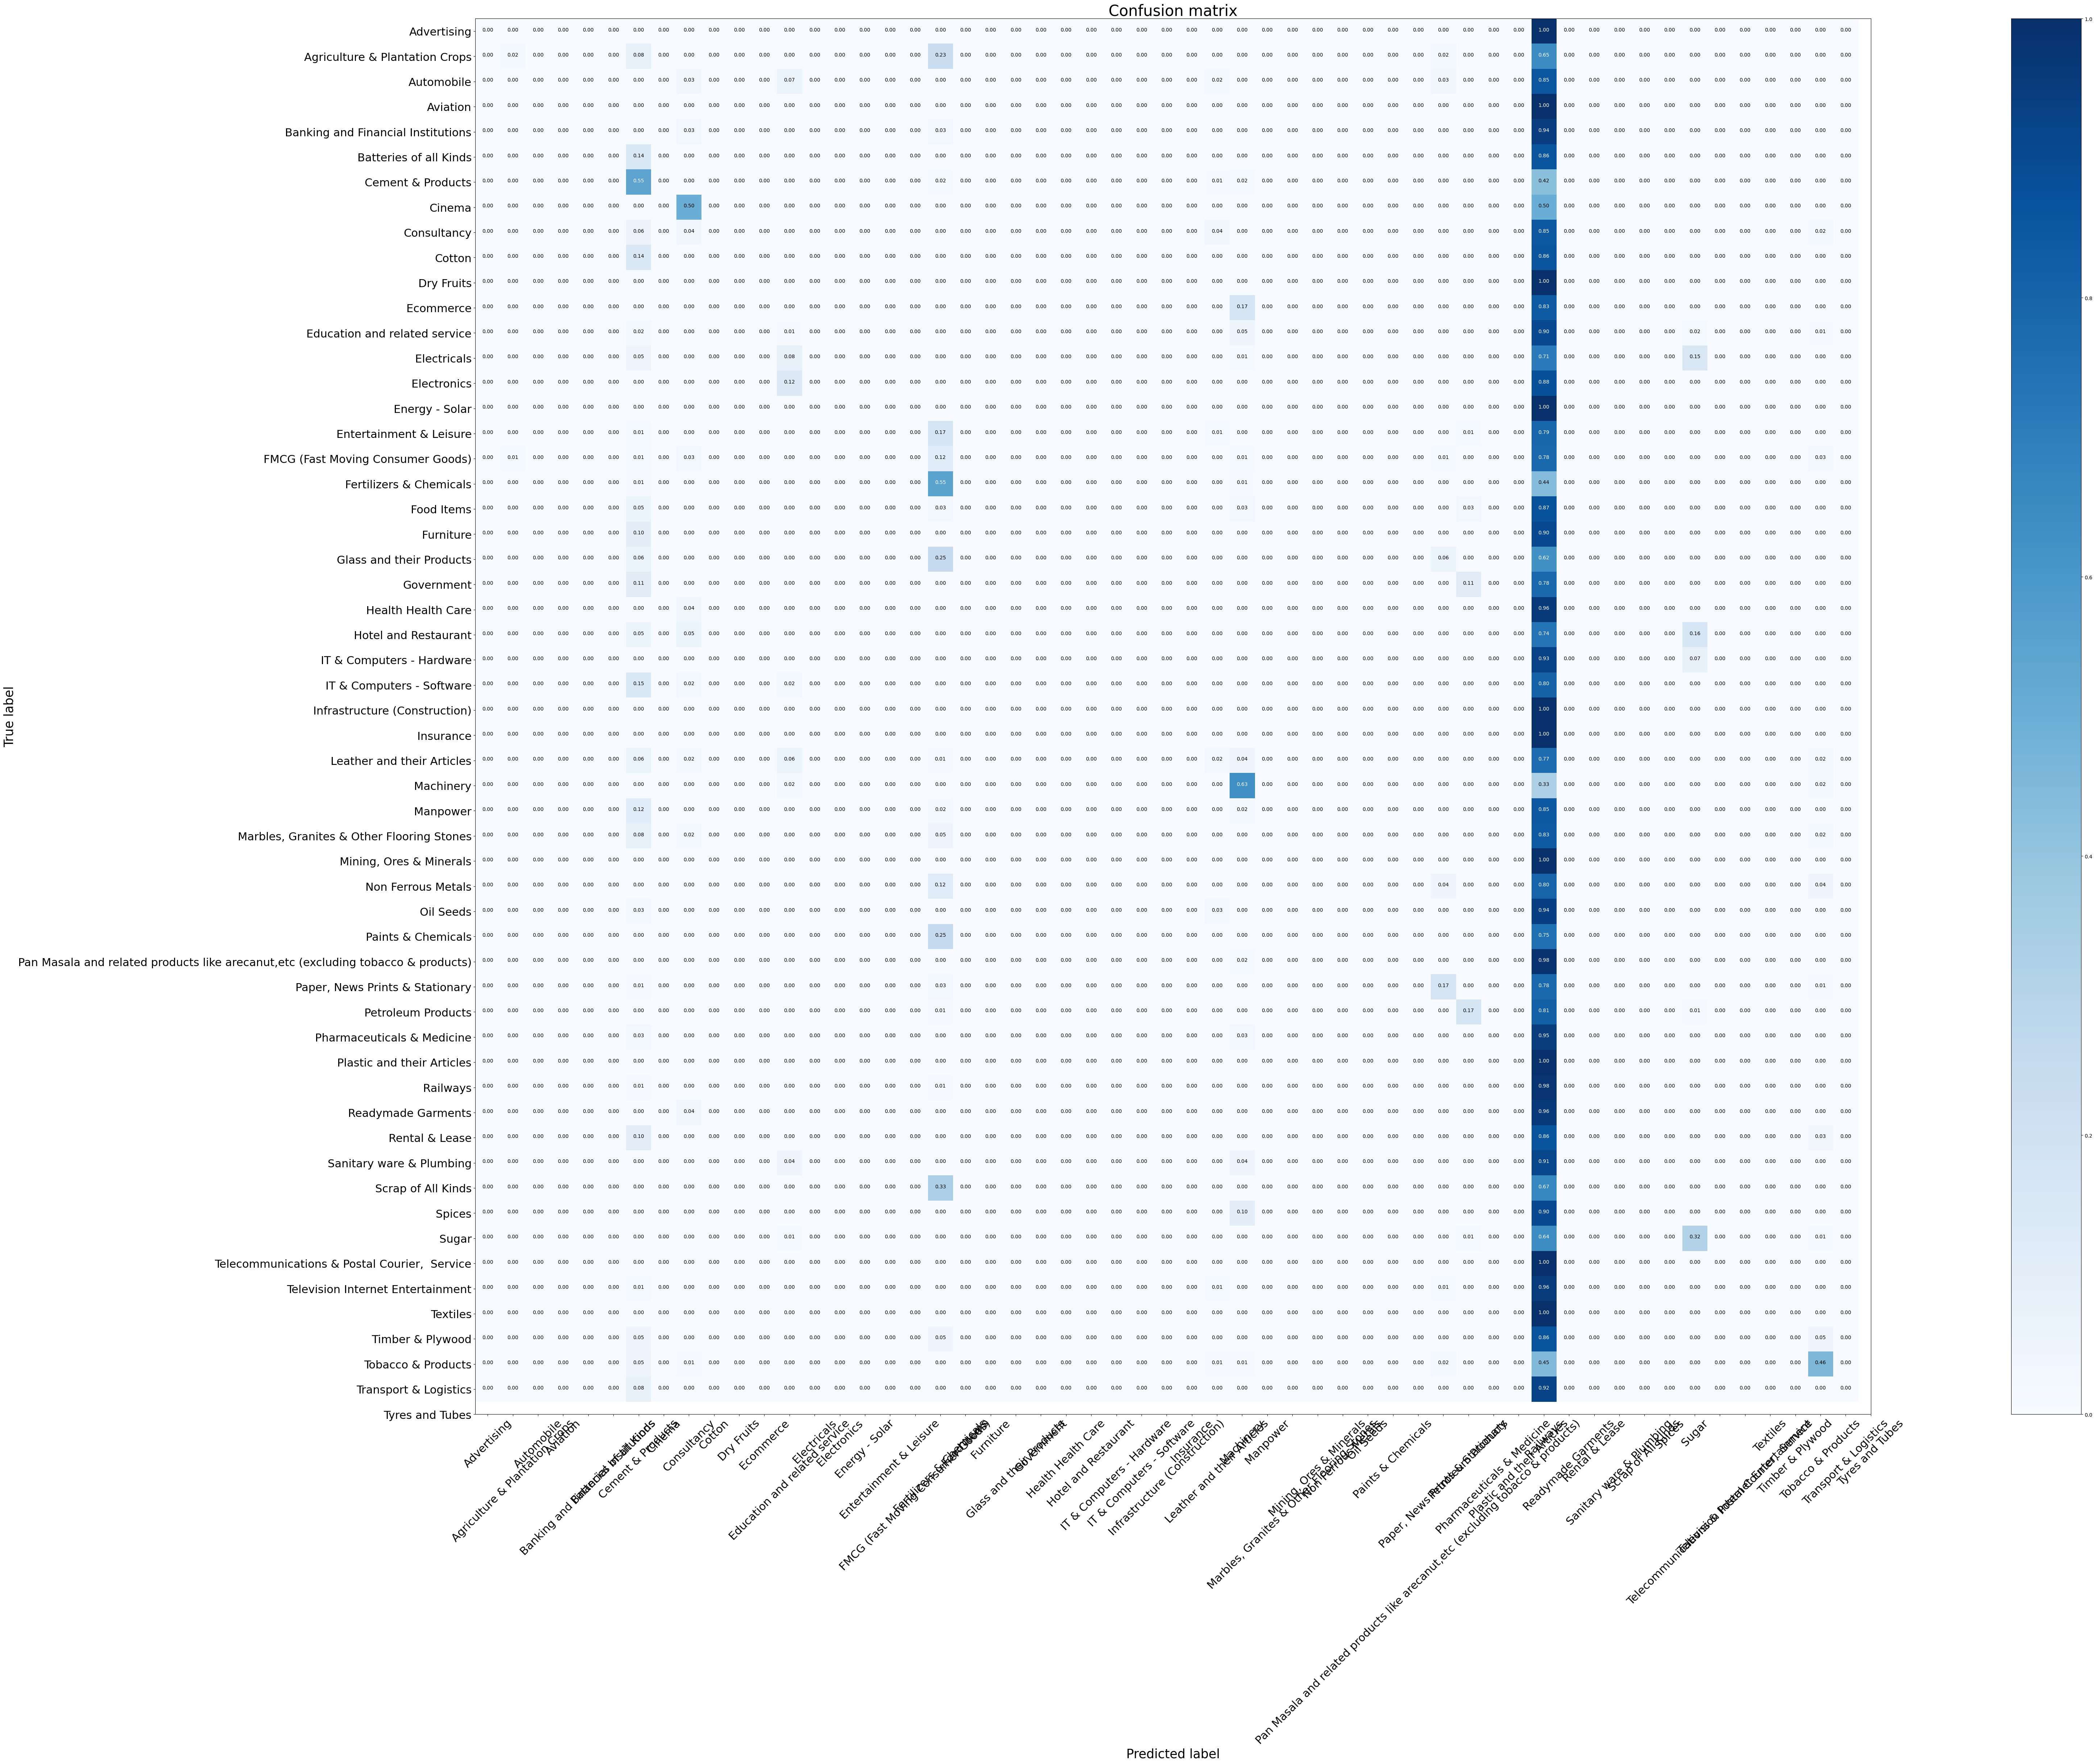

In [40]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(100,50))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [57]:
from sklearn.ensemble import IsolationForest


In [58]:
modelIso = IsolationForest(contamination=0.05)